In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
dataset = fetch_california_housing()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['target']=dataset.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.shape

(20640, 9)

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [13]:
parameters = {
    'criterion':('squared_error','friedman_mse','absolute_error','poisson'),
    'splitter':('best','random'),
    'max_depth':[3,4,5,6,7,8]
}

In [14]:
regressor = DecisionTreeRegressor()

In [15]:
clf = GridSearchCV(regressor,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [16]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'splitter': ('best', 'random')},
             scoring='neg_mean_squared_error')

In [17]:
clf.best_params_

{'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'best'}

In [18]:
regressor = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=8,splitter='best')

In [19]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([0.6640999 , 0.84788646, 4.28292211, ..., 1.56938475, 1.66649065,
       3.55318077])

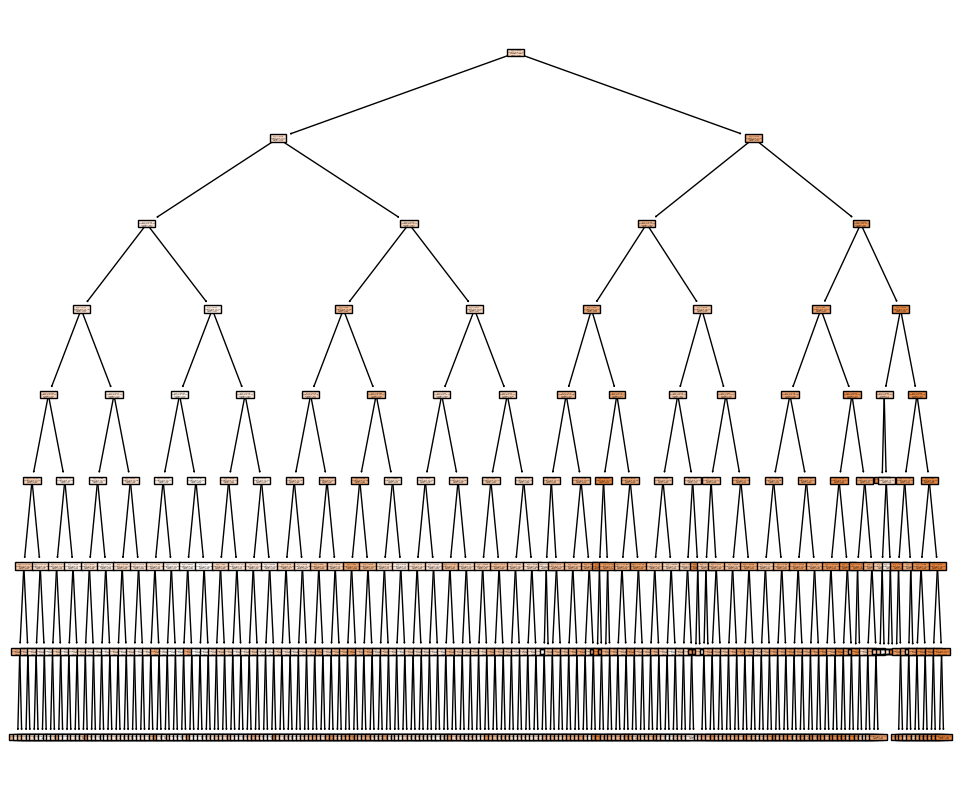

In [22]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

#### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.45974806337068547
MSE: 0.4416611440475031
RMSE: 0.6645759129305719
